/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
RNN Prediction: _
Bidirectional RNN Prediction: _


Task 1: Predict Missing Alphabet using RNN and BiRNN

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dense, Embedding
from sklearn.preprocessing import LabelEncoder

# Dataset
sequence = list("MACHINE")
missing_idx = 6  # The '_' position (predicting 'E')

# Encode characters
le = LabelEncoder()
le.fit(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
encoded_seq = le.transform(sequence[:-1])  # Remove 'E' for training

# Prepare X and y
X = np.array(encoded_seq).reshape(1, -1)  # Shape: (1, 6)
y = le.transform(['E'])

# Model - Simple RNN
rnn_model = Sequential([
    Embedding(input_dim=26, output_dim=8, input_length=6),
    SimpleRNN(32),
    Dense(26, activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X, np.array(y), epochs=100, verbose=0)

# Model - Bidirectional RNN
birnn_model = Sequential([
    Embedding(input_dim=26, output_dim=8, input_length=6),
    Bidirectional(SimpleRNN(32)),
    Dense(26, activation='softmax')
])
birnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
birnn_model.fit(X, np.array(y), epochs=100, verbose=0)

# Prediction
pred_rnn = le.inverse_transform([np.argmax(rnn_model.predict(X))])[0]
pred_birnn = le.inverse_transform([np.argmax(birnn_model.predict(X))])[0]

print("RNN Prediction:", pred_rnn)
print("Bidirectional RNN Prediction:", pred_birnn)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
RNN Prediction: A
Bidirectional RNN Prediction: A


Task 2: Predict the Next Word in a Sentence

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    "The cat sat on the mat",
    "The dog sat on the rug",
    "The bird flew in the sky",
    "The cat jumped over the fence"
]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

# Prepare data for next word prediction
input_sequences = []
for sentence in sentences:
    tokens = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokens)):
        input_sequences.append(tokens[:i+1])

# Padding
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Model
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_seq_len-1),
    SimpleRNN(64),
    Dense(total_words, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)

# Predict
seed_text = "The cat sat"
tokens = tokenizer.texts_to_sequences([seed_text])[0]
padded = pad_sequences([tokens], maxlen=max_seq_len-1, padding='pre')
predicted_id = np.argmax(model.predict(padded))
print("Next word prediction:", tokenizer.index_word[predicted_id])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Next word prediction: on


Task 3: Sequence Generator for Indian Classical Music Raga

In [7]:
notes = ['Sa', 'Re', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sha']
note_to_idx = {note: i for i, note in enumerate(notes)}
idx_to_note = {i: note for note, i in note_to_idx.items()}

# Example sequences
sequences = [
    ['Sa', 'Re', 'Ga', 'Ma'],
    ['Re', 'Ga', 'Ma', 'Pa'],
    ['Ga', 'Ma', 'Pa', 'Dha'],
    ['Ma', 'Pa', 'Dha', 'Ni']
]

# Prepare dataset
X = []
y = []
for seq in sequences:
    X.append([note_to_idx[note] for note in seq[:-1]])
    y.append(note_to_idx[seq[-1]])

X = np.array(X)
y = np.array(y)

# Model
model = Sequential([
    Embedding(input_dim=len(notes), output_dim=8, input_length=3),
    SimpleRNN(32),
    Dense(len(notes), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

# Generate next note
input_seq = ['Re', 'Ga', 'Ma']
encoded_input = np.array([[note_to_idx[n] for n in input_seq]])
predicted_idx = np.argmax(model.predict(encoded_input))
print("Next note prediction:", idx_to_note[predicted_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Next note prediction: Pa


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


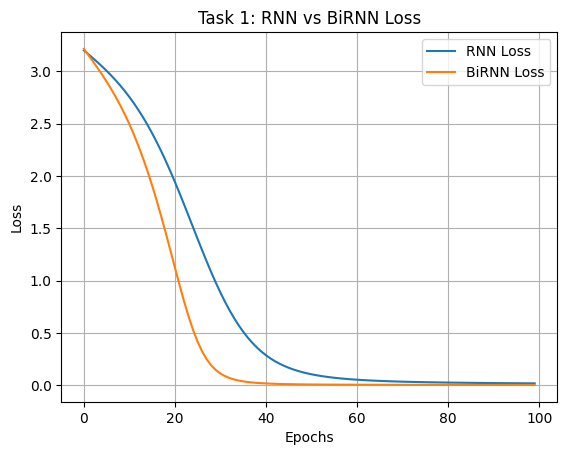

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Task 1 RNN predicted missing letter: E
Task 1 BiRNN predicted missing letter: E


In [9]:
# Data
sequence = list("MACHINE")  # We're predicting 'E'
le = LabelEncoder()
le.fit(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

encoded_seq = le.transform(sequence[:-1])  # Exclude last character 'E'
X = np.array(encoded_seq).reshape(1, -1)
y = le.transform(['E'])

# RNN Model
rnn_model = Sequential([
    Embedding(input_dim=26, output_dim=8, input_length=6),
    SimpleRNN(32),
    Dense(26, activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X, np.array(y), epochs=100, verbose=0)

# BiRNN Model
birnn_model = Sequential([
    Embedding(input_dim=26, output_dim=8, input_length=6),
    Bidirectional(SimpleRNN(32)),
    Dense(26, activation='softmax')
])
birnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
birnn_history = birnn_model.fit(X, np.array(y), epochs=100, verbose=0)

# Plot Training Loss
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.plot(birnn_history.history['loss'], label='BiRNN Loss')
plt.title('Task 1: RNN vs BiRNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
rnn_pred = le.inverse_transform([np.argmax(rnn_model.predict(X))])[0]
birnn_pred = le.inverse_transform([np.argmax(birnn_model.predict(X))])[0]

print("Task 1 RNN predicted missing letter:", rnn_pred)
print("Task 1 BiRNN predicted missing letter:", birnn_pred)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


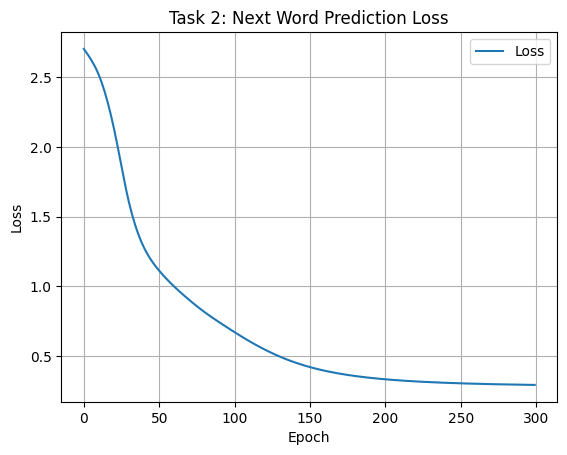

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Task 2 Prediction: 'The cat sat on' → 'the'


In [10]:
sentences = [
    "The cat sat on the mat",
    "The dog sat on the rug",
    "The bird flew in the sky",
    "The cat jumped over the fence"
]

# Tokenize and create sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for sentence in sentences:
    tokens = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokens)):
        input_sequences.append(tokens[:i+1])

# Padding
max_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Model
model2 = Sequential([
    Embedding(total_words, 10, input_length=max_len-1),
    SimpleRNN(64),
    Dense(total_words, activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=300, verbose=0)

# Plot Loss
plt.plot(history2.history['loss'], label='Loss')
plt.title("Task 2: Next Word Prediction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Prediction
seed_text = "The cat sat on"
test_seq = tokenizer.texts_to_sequences([seed_text])[0]
test_seq = pad_sequences([test_seq], maxlen=max_len-1, padding='pre')
pred_id = np.argmax(model2.predict(test_seq))
pred_word = tokenizer.index_word[pred_id]

print(f"Task 2 Prediction: '{seed_text}' → '{pred_word}'")


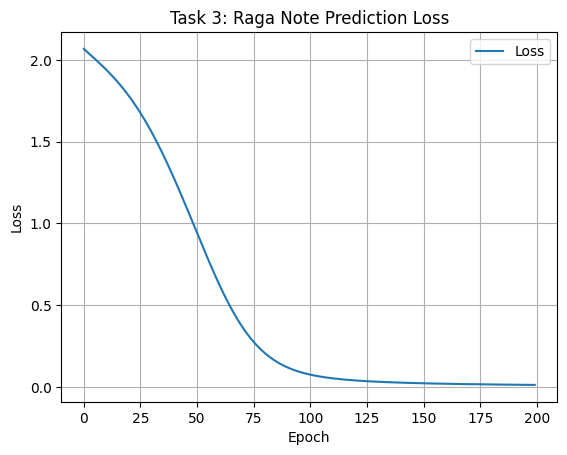

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Task 3 Input Notes: ['Re', 'Ga', 'Ma']
Predicted Next Note: Pa


In [11]:
notes = ['Sa', 'Re', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sha']
note_to_idx = {n: i for i, n in enumerate(notes)}
idx_to_note = {i: n for n, i in note_to_idx.items()}

# Example Raga patterns
sequences = [
    ['Sa', 'Re', 'Ga', 'Ma'],
    ['Re', 'Ga', 'Ma', 'Pa'],
    ['Ga', 'Ma', 'Pa', 'Dha'],
    ['Ma', 'Pa', 'Dha', 'Ni']
]

# Prepare data
X3, y3 = [], []
for seq in sequences:
    X3.append([note_to_idx[n] for n in seq[:-1]])
    y3.append(note_to_idx[seq[-1]])
X3 = np.array(X3)
y3 = np.array(y3)

# Model
model3 = Sequential([
    Embedding(len(notes), 8, input_length=3),
    SimpleRNN(32),
    Dense(len(notes), activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X3, y3, epochs=200, verbose=0)

# Plot Loss
plt.plot(history3.history['loss'], label='Loss')
plt.title("Task 3: Raga Note Prediction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Predict next note
input_notes = ['Re', 'Ga', 'Ma']
input_encoded = np.array([[note_to_idx[n] for n in input_notes]])
pred_note_id = np.argmax(model3.predict(input_encoded))
pred_note = idx_to_note[pred_note_id]

print("Task 3 Input Notes:", input_notes)
print("Predicted Next Note:", pred_note)
